In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

import glob
import matplotlib.pyplot as plt
import tikzplotlib

from plotting import load_data
from plotting import plot_scalar
from plotting import print_infos
from scipy.signal import savgol_filter

### Plot Settings

is already specified in plotting.py, but can be overwritten here

In [32]:
plt.rcParams["figure.figsize"] = (16,9)

In [5]:
# see available styles
# print(plt.style.available)

In [6]:
plt.style.use('ggplot')

### Plotting Example

In [7]:
# load data
data = load_data(25, load_histos=False)

W0730 20:57:56.859406 140254042216256 deprecation_wrapper.py:118] From /home/kaijeggle/dev/Uni/rL_project/Wizard/tests/plotting/plotting.py:49: The name tf.train.summary_iterator is deprecated. Please use tf.compat.v1.train.summary_iterator instead.

W0730 20:57:56.861484 140254042216256 deprecation.py:323] From /home/kaijeggle/dev/Uni/rL_project/wizard_python/lib/python3.6/site-packages/tensorflow/python/summary/summary_iterator.py:68: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [8]:
print_infos(data)

##### Agents #####
TFAgentsPPOAgent


##### Summaries #####


### TFAgentsPPOAgent ###


## scalars ##


1_win_percentage (949 time steps)
2_score (949 time steps)
7_valid_rate (949 time steps)
5_predictor_loss (948 time steps)
3_predictor_acc (948 time steps)
6_prediction_differences (949 time steps)
4_predictor_acc_real (949 time steps)
7_overall_mean_predictions_0 (949 time steps)
8_correct_mean_predictions_0 (949 time steps)
9_incorrect_mean_predictions_0 (949 time steps)
7_overall_mean_predictions_1 (949 time steps)
8_correct_mean_predictions_1 (949 time steps)
9_incorrect_mean_predictions_1 (949 time steps)
7_overall_mean_predictions_2 (949 time steps)
8_correct_mean_predictions_2 (949 time steps)
9_incorrect_mean_predictions_2 (949 time steps)
7_overall_mean_predictions_3 (949 time steps)
8_correct_mean_predictions_3 (949 time steps)
9_incorrect_mean_predictions_3 (949 time steps)
7_overall_mean_predictions_4 (949 time steps)
8_correct_mean_predictions_4 (949 time steps)
9_incor

Agents that have data for metric `2_score`:  ['TFAgentsPPOAgent']
663 949


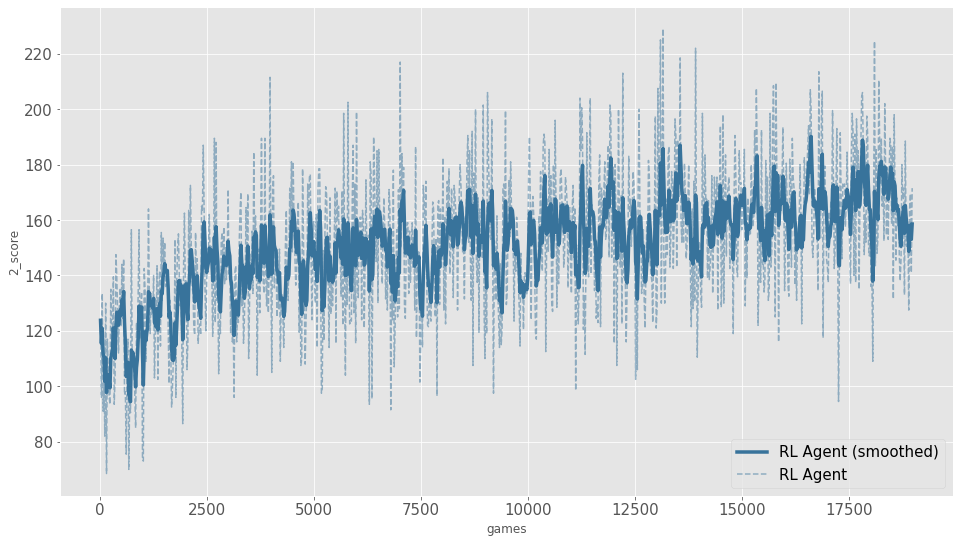

In [9]:
plot_scalar(data, summary_name='2_score',smoothing=True, smoothing_factor=0.7)

## Plotting for Poster

In [21]:
vs_old_log_path = '/home/kaijeggle/Documents/Uni/TUB/Courses/NI_Project/Logs_And_Models_From_Cloud/train_vs_old/'
vs_current_log_path = '/home/kaijeggle/Documents/Uni/TUB/Courses/NI_Project/Logs_And_Models_From_Cloud/train_vs_current/'
evaluation_vs_old = '/home/kaijeggle/Documents/Uni/TUB/Courses/NI_Project/Logs_And_Models_From_Cloud/evaluate_vs_old/'
evaluation_vs_current = '/home/kaijeggle/Documents/Uni/TUB/Courses/NI_Project/Logs_And_Models_From_Cloud/evaluate_vs_current/'

In [22]:
evaluation_vs_old_2 = '/home/kaijeggle/Documents/Uni/TUB/Courses/NI_Project/evaluate_vs_current_2/4'

In [23]:
time_range = [0,60000]

### load data

In [24]:
train_vs_old_data = load_data(1, load_histos=False, log_path = vs_old_log_path, time_range=time_range)

In [25]:
train_vs_current_data = load_data(1, load_histos=False, log_path = vs_old_log_path, time_range=time_range)

In [26]:
evaluate_vs_current_data = load_data(1, load_histos=False, log_path = evaluation_vs_current, time_range=time_range)

In [27]:
evaluate_vs_old_data = load_data(1, load_histos=False, log_path = evaluation_vs_old, time_range=time_range)

In [28]:
evaluate_vs_old_data_2 = load_data(1, load_histos=False, log_path = evaluation_vs_old_2, time_range=time_range)

In [29]:
print_infos(evaluate_vs_old_data_2)

##### Agents #####


##### Summaries #####




### Plot Score

ToDo: matplotlib to tix

Agents that have data for metric `2_score`:  ['TFAgentsPPOAgent']
2969 3000


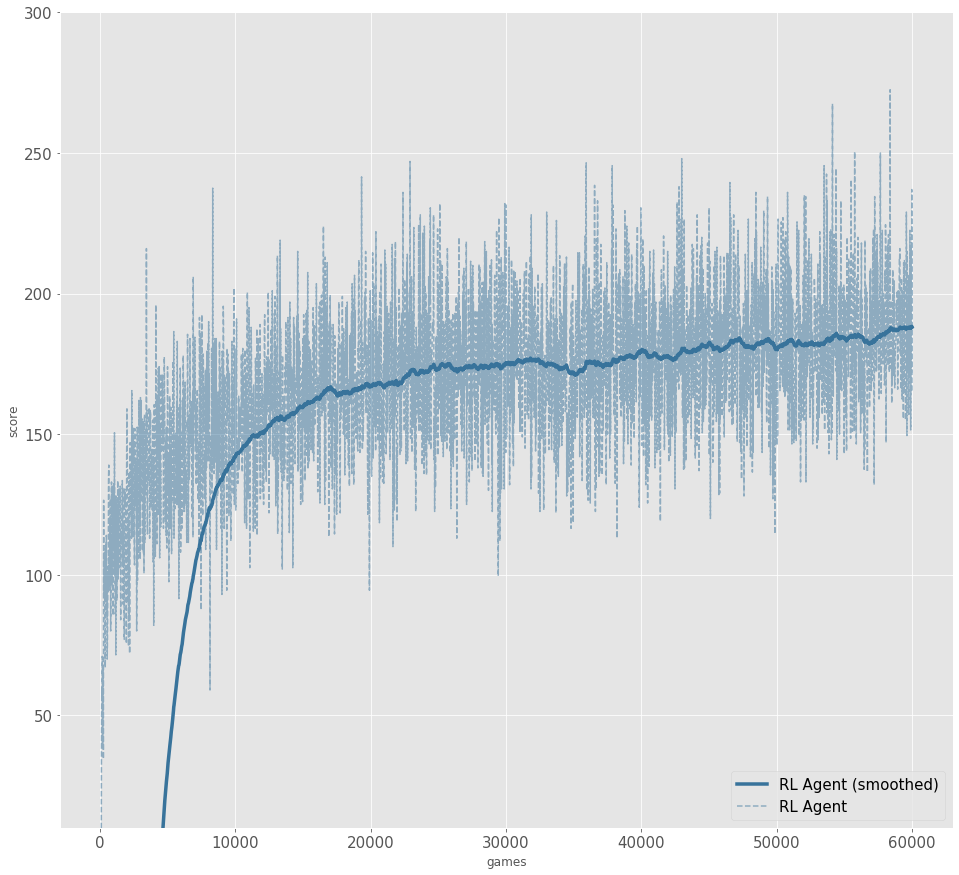

In [33]:
plot_scalar(train_vs_old_data, summary_name='2_score', save_plot=True, ylim=(10,300),ylabel='score', smoothing=True, plot_original=True, smoothing_factor=0.99)

In [31]:
get_average_value(train_vs_old_data, summary_name='2_score', time_range=[59000,60000])

NameError: name 'get_average_value' is not defined

### Plot Accuracy / Mean Prediction

In [ ]:
plot_scalar(train_vs_old_data, summary_name='4_predictor_acc_real', save_plot=True, ylim= [0.35, 0.6],ylabel="accuracy", smoothing=True, plot_original=True, smoothing_factor=0.99)

### Evaluation

With overfitted Model

Agents that have data for metric `2_score`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
1683 1700
1683 1700
1683 1700
1683 1700


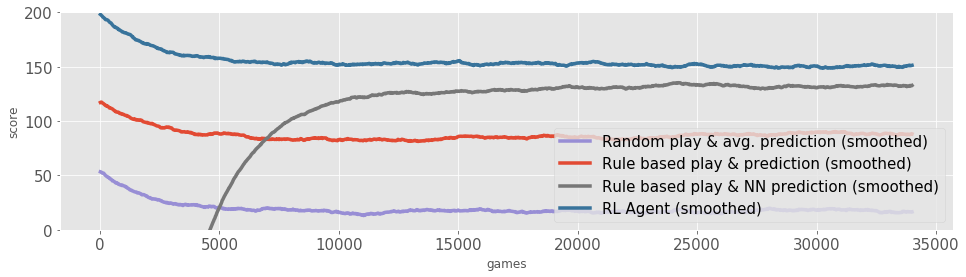

In [130]:
plot_scalar(evaluate_vs_current_data, summary_name='2_score', plot_title="evaluation_current", save_plot=True,ylim = [0, 200],ylabel='score', smoothing=True, plot_original=False, smoothing_factor=0.99)

In [95]:
get_average_value(evaluate_vs_current_data, summary_name='2_score', time_range=[30000,40000])

Agents that have data for metric `2_score`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
201
AverageRandomPlayer: 16.84328358208955
201
RuleBasedAgent: 87.86567164179104
201
RuleBasedAgentPredictor: 133.0497512437811
201
TFAgentsPPOAgent: 150.78855721393035


Agents that have data for metric `1_win_percentage`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
1683 1700
1683 1700
1683 1700
1683 1700


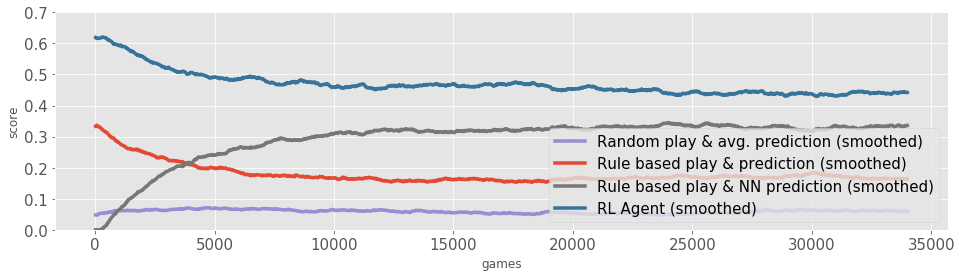

In [133]:
plot_scalar(evaluate_vs_current_data, summary_name='1_win_percentage', plot_title="evaluation_current_win", save_plot=True,ylim = [0, 0.7], ylabel='score', smoothing=True, plot_original=False, smoothing_factor=0.99)

In [96]:
get_average_value(evaluate_vs_current_data, summary_name='1_win_percentage')

Agents that have data for metric `1_win_percentage`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
1700
AverageRandomPlayer: 0.059645659434883036
1700
RuleBasedAgent: 0.1692843167089364
1700
RuleBasedAgentPredictor: 0.31229411945842644
1700
TFAgentsPPOAgent: 0.45877591134870754


#### not overfitted

In [24]:
plot_scalar(evaluate_vs_old_data, summary_name='2_score', plot_title="evaluation_old", save_plot=True,ylim = [0, 200], ylabel='score', smoothing=True, plot_original=False, smoothing_factor=0.99)

NameError: name 'evaluate_vs_old_data' is not defined

Agents that have data for metric `2_score`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
641 649
421 426
641 649
641 649


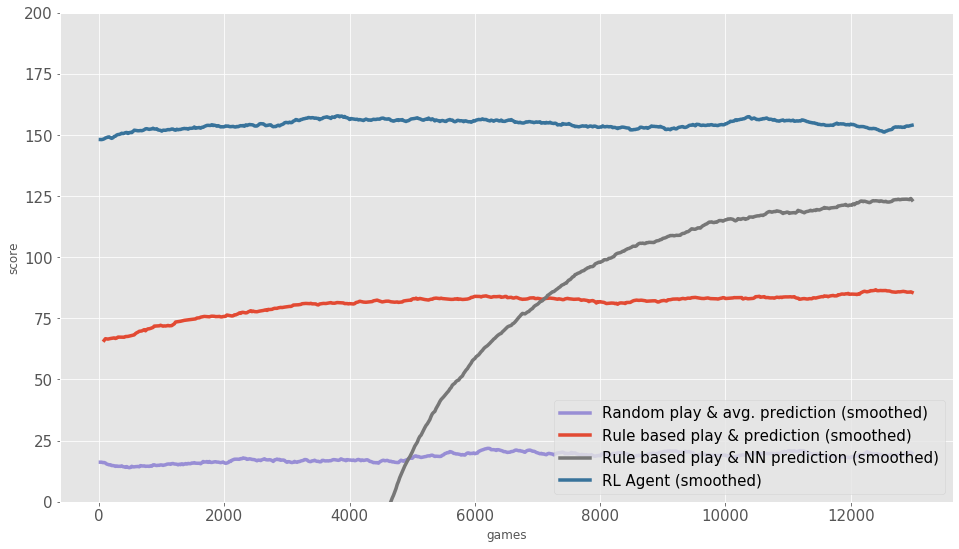

In [31]:
plot_scalar(evaluate_vs_old_data_2, summary_name='2_score', plot_title="evaluation_old", save_plot=True,ylim = [0, 200], ylabel='score', smoothing=True, plot_original=False, smoothing_factor=0.99)

In [94]:
get_average_value(evaluate_vs_old_data, summary_name='2_score', time_range=[30000,40000])

Agents that have data for metric `2_score`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
501
AverageRandomPlayer: 17.005988023952096
501
RuleBasedAgent: 84.83433133732535
501
RuleBasedAgentPredictor: 131.79441117764472
501
TFAgentsPPOAgent: 154.74950099800398


Agents that have data for metric `1_win_percentage`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
2229 2252
2229 2252
2229 2252
2229 2252


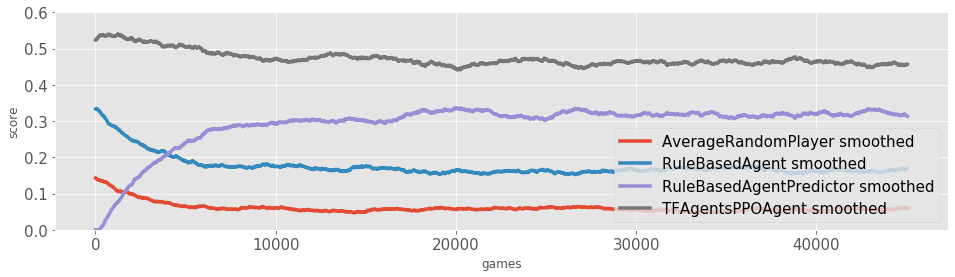

In [116]:
plot_scalar(evaluate_vs_old_data, summary_name='1_win_percentage', plot_title="evaluation_old_win", save_plot=True,ylim = [0, 0.6], ylabel='score', smoothing=True, plot_original=False, smoothing_factor=0.99)

In [92]:
get_average_value(evaluate_vs_old_data, summary_name='1_win_percentage')

Agents that have data for metric `1_win_percentage`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
501
AverageRandomPlayer: 0.05299401295904866
501
RuleBasedAgent: 0.16616766763007093
501
RuleBasedAgentPredictor: 0.3181636742503938
501
TFAgentsPPOAgent: 0.4626746522392817


In [46]:
get_variance(evaluate_vs_old_data, summary_name='2_score', time_range=[15000,40000])

Agents that have data for metric `2_score`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
1251
AverageRandomPlayer: 412.42261091206973
1251
RuleBasedAgent: 441.4184693811697
1251
RuleBasedAgentPredictor: 487.9049521374108
1251
TFAgentsPPOAgent: 514.8086138603106


In [45]:
get_variance(evaluate_vs_current_data, summary_name='2_score', time_range=[15000,40000])

Agents that have data for metric `2_score`:  ['AverageRandomPlayer', 'RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgent']
951
AverageRandomPlayer: 457.095700911432
951
RuleBasedAgent: 443.47316124152894
951
RuleBasedAgentPredictor: 442.9511439062982
951
TFAgentsPPOAgent: 541.7080432241893


In [87]:
def get_average_value(data, summary_name, time_range=[10000,60000]):
              
    agents = data.keys()
             
            
    agents_with_data = [agent for agent in agents if summary_name in data[agent]['scalars'].keys()]
    print(f'Agents that have data for metric `{summary_name}`: ', agents_with_data)
    
    for index, agent in enumerate(agents_with_data):
        agent_data = data[agent]['scalars'][summary_name]
        time_ranged_data = [x[1] for x in agent_data if time_range[0] <= x[0] <= time_range[1]]
        print(len(time_ranged_data))
        mean_value = np.mean(time_ranged_data)
        
        print(f'{agent}: {mean_value}')

    

In [42]:
def get_variance(data, summary_name, time_range=[0,60000]):
              
    agents = data.keys()
             
            
    agents_with_data = [agent for agent in agents if summary_name in data[agent]['scalars'].keys()]
    print(f'Agents that have data for metric `{summary_name}`: ', agents_with_data)
    
    for index, agent in enumerate(agents_with_data):
        agent_data = data[agent]['scalars'][summary_name]
        time_ranged_data = [x[1] for x in agent_data if time_range[0] <= x[0] <= time_range[1]]
        print(len(time_ranged_data))
        mean_value = np.var(time_ranged_data)
        
        print(f'{agent}: {mean_value}')

    

ToDos:
    * Smooting issue
    * Line Thickness

    

Notes:
    * Include Winpercentage